# <center><u><font color='red'> Prédiction des émissions  de CO2</font></u></center>

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge,Lasso,ElasticNet,LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from functions import utils
import math
from sklearn.svm import SVR
from xgboost import XGBRegressor 
from functions.functions import *
from sklearn.neural_network import MLPRegressor
import warnings
warnings.filterwarnings('ignore')
from IPython.display import display
pd.options.display.float_format = '{:,.4f}'.format


In [25]:
target_col='TotalGHGEmissions'
stratify_col='PrimaryPropertyType'

In [26]:
df=pd.read_csv('data/cleaned_and_normalized_pca.csv')


In [27]:
df.head()

,pca_0,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,...,pca_30,pca_31,pca_32,pca_33,pca_34,pca_35,pca_36,PrimaryPropertyType,TotalGHGEmissions,SiteEnergyUse(kBtu)
0,3.4191,1.0240,-3.7104,-0.9170,1.1474,-1.7295,2.1265,3.9987,5.8246,-1.9512,...,1.4115,-1.7641,0.3827,-0.0011,1.1814,1.1584,0.5349,Other,221.5100,"6,298,131.5000"
1,0.0907,0.3478,-1.9524,-1.4897,0.6897,0.8147,0.3515,1.2177,0.6393,0.2711,...,1.3925,-1.3145,-1.3175,-0.4507,-0.1133,-0.6598,-0.6136,Mixed Use Property,273.0200,"7,606,084.5000"
2,1.5319,-1.3977,0.7355,1.9839,-0.9851,-1.6633,-0.5505,1.4322,2.6171,-0.3559,...,-4.7515,-3.9549,2.4747,-3.3245,-6.5102,3.8672,5.8284,Other,9.1300,"1,310,236.6250"
3,0.7681,1.5084,-2.1860,-0.6462,0.2466,0.0128,-0.0075,-0.0937,-0.2297,-0.3003,...,0.0059,0.0036,-0.0355,-0.0141,0.0069,0.0202,0.0097,Small- and Mid-Sized Office,157.7700,"4,145,920.5000"
4,0.8153,2.7898,-1.6864,0.9948,-1.0459,-1.5422,1.4146,1.2781,0.2576,0.7766,...,0.5275,0.0113,-0.5034,0.0715,0.0659,0.2032,0.1485,Hotel,215.0000,"6,668,568.5000"


In [28]:
cols=['best_params','R2','rmse','model','time_elapsed']
df_result=pd.DataFrame(columns=cols)
df_result_with_energy_star_score=pd.DataFrame(columns=cols)

In [29]:
test_size=0.25
random_state=42
cv=5
scoring='r2'
feature_cols=[col for col in df.columns.tolist() if col not in ['TotalGHGEmissions','SiteEnergyUse(kBtu)','ENERGYSTARScore',stratify_col]]

 
feature_cols_with_energy_star_score=[col for col in df.columns.tolist() if col not in ['TotalGHGEmissions','SiteEnergyUse(kBtu)','ENERGYSTARScore',stratify_col]]



In [30]:
stratify=df[[stratify_col]]
X_train,X_test,y_train,y_test=train_test_split(df[feature_cols],df[target_col],test_size=test_size,random_state=random_state)
X_train_with_energy_star_score=X_train[feature_cols_with_energy_star_score]
X_test_with_energy_star_score=X_test[feature_cols_with_energy_star_score]
train_y=y_train.values
test_y=y_test.values


## Partie 1 modèles linéaires

### 1 <u>Modèle linéaire simple</u>

#### 1-1 <u>Régression linéaire sans ENERGYSTARScore </u>

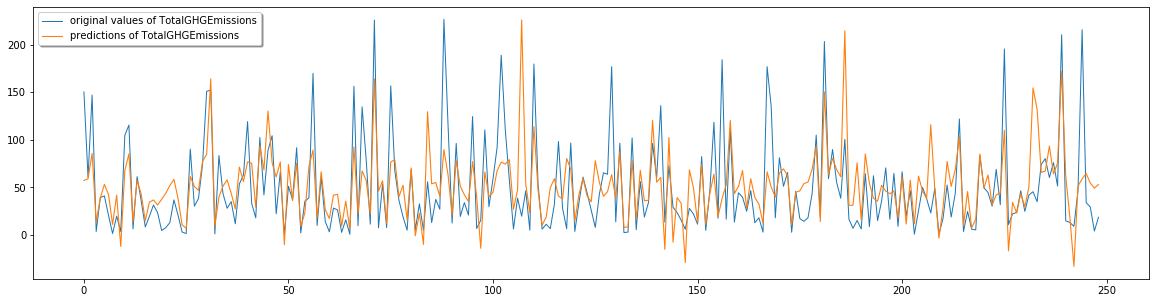

,best_params,R2,rmse,model,time_elapsed
0,None,0.3665,39.0850,LinearRegression,0.0025


In [31]:

train_x=X_train.values
test_x=X_test.values
 

result=utils.model_func(df,LinearRegression(),target_col,feature_cols,test_size,random_state,train_x,test_x,train_y,test_y)

df_result=df_result.append(result,ignore_index = True)
df_result

#### 1-2  <u>Régression linéaire avec ENERGYSTARScore </u>

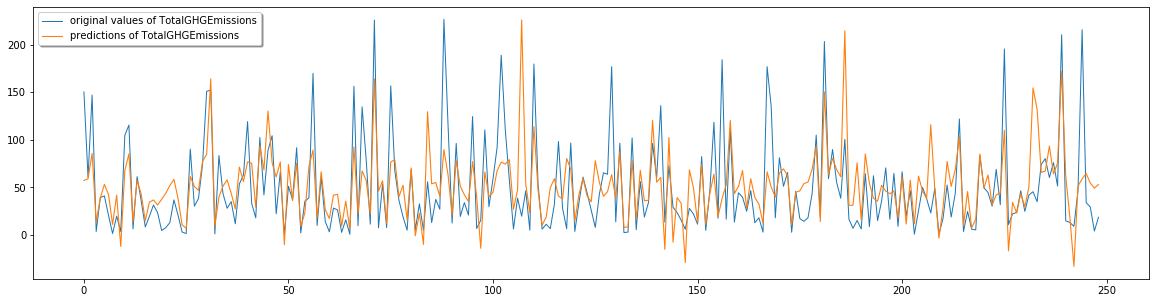

{'best_params': None, 'R2': 0.3664524586595763, 'rmse': 39.08500267005119, 'model': 'LinearRegression', 'time_elapsed': 0.0026063239929499105}


In [32]:

train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values
 
result=utils.model_func(df,LinearRegression(),target_col,feature_cols_with_energy_star_score,test_size,random_state,train_x,test_x,train_y,test_y)

df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
df_result_with_energy_star_score
print(result)

### 2 <u>Régression de ridge</u>

#### 2-1 <u>Régression de ridge sans ENERGYSTARScore </u>

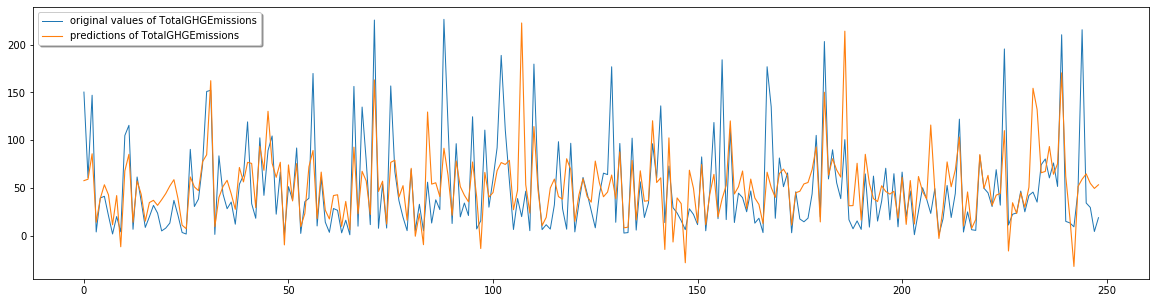

{'best_params': {'alpha': 2, 'fit_intercept': True, 'solver': 'saga'}, 'R2': -0.038362462250651166, 'rmse': 38.991318868219736, 'model': 'Ridge', 'time_elapsed': 1.6243900650006253}


In [33]:

train_x=X_train_with_energy_star_score.values
test_x=X_test.values
 
param_grid = [{
    #'alpha':np.arange(0.01,2.01,0.01), 1.9200000000000002
    'alpha':[0,1,1.92,2],
    'fit_intercept':[True,False],
  
  'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}]



scoring = 'r2'
 
model = Ridge(random_state=random_state)
#ridge.best_params_,ridge.best_score_,rmse,model.__class__.__name__,elapsed
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)

df_result=df_result.append(result,ignore_index = True)
print(result)

#### 2-2 <u>Régression de ridge avec ENERGYSTARScore </u>

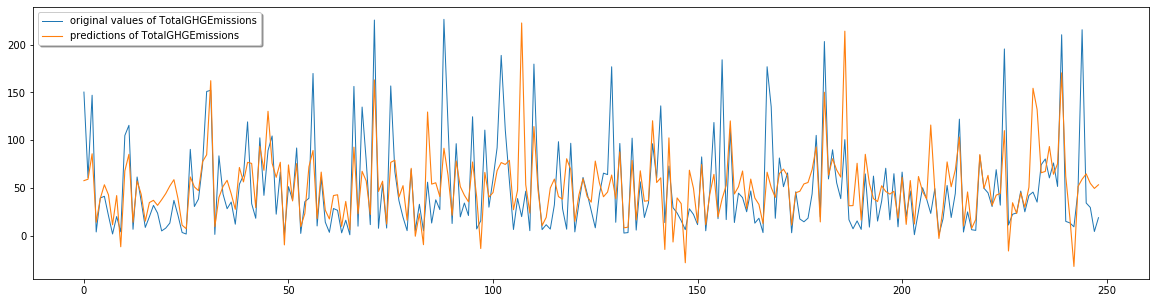

{'best_params': {'alpha': 2, 'fit_intercept': True, 'solver': 'saga'}, 'R2': -0.038362462250651166, 'rmse': 38.991318868219736, 'model': 'Ridge', 'time_elapsed': 1.5720659920043545}


,best_params,R2,rmse,model,time_elapsed
0,None,0.3665,39.0850,LinearRegression,0.0026
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",-0.0384,38.9913,Ridge,1.5721


In [34]:
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values

 
param_grid = [{
    #'alpha':np.arange(0.01,2.01,0.01), 1.9200000000000002
    'alpha':[0,1,1.92,2],
    'fit_intercept':[True,False],
  
  'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']
}]


 
model = Ridge(random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
print(result)
df_result_with_energy_star_score

### 3 <u>Régression de Lasso</u>

#### 3-1 <u>Régression de Lasso sans ENERGYSTARScore </u>

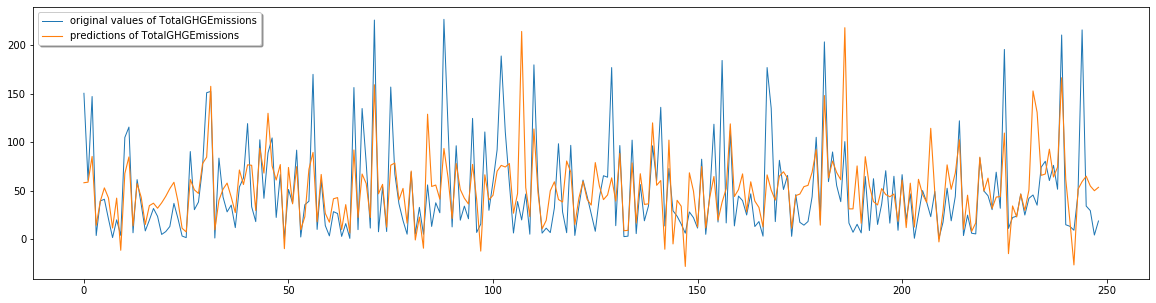

{'best_params': {'alpha': 0.105, 'fit_intercept': True}, 'R2': 0.0013446455303848914, 'rmse': 38.80730169689068, 'model': 'Lasso', 'time_elapsed': 0.03987831900303718}


,best_params,R2,rmse,model,time_elapsed
0,None,0.3665,39.0850,LinearRegression,0.0025
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",-0.0384,38.9913,Ridge,1.6244
2,"{'alpha': 0.105, 'fit_intercept': True}",0.0013,38.8073,Lasso,0.0399


In [35]:
train_x=X_train.values
test_x=X_test.values

 
param_grid = [{
   # 'alpha':np.arange(0,0.99,0.001),
     'alpha':[0.105],
    'fit_intercept':[True,False],
  
  
}]


 
 
model = Lasso( random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)

df_result=df_result.append(result,ignore_index = True)
print(result)
df_result

#### 3-2 <u>Régression de Lasso avec ENERGYSTARScore </u>

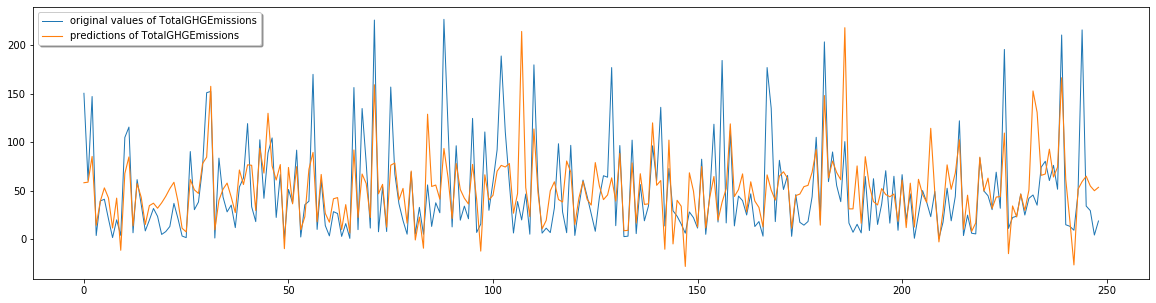

{'best_params': {'alpha': 0.105, 'fit_intercept': True}, 'R2': 0.0013446455303848914, 'rmse': 38.80730169689068, 'model': 'Lasso', 'time_elapsed': 0.032471796992467716}


,best_params,R2,rmse,model,time_elapsed
0,None,0.3665,39.0850,LinearRegression,0.0026
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",-0.0384,38.9913,Ridge,1.5721
2,"{'alpha': 0.105, 'fit_intercept': True}",0.0013,38.8073,Lasso,0.0325


In [36]:
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values

 
param_grid = [{
   # 'alpha':np.arange(0,0.99,0.001),
     'alpha':[0.105],
    'fit_intercept':[True,False],
  
  
}]

 
model = Lasso( random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
print(result)
df_result_with_energy_star_score

### 4 <u>Régression de ElasticNet</u>

#### 4-1 <u>Régression de ElasticNet sans ENERGYSTARScore </u>

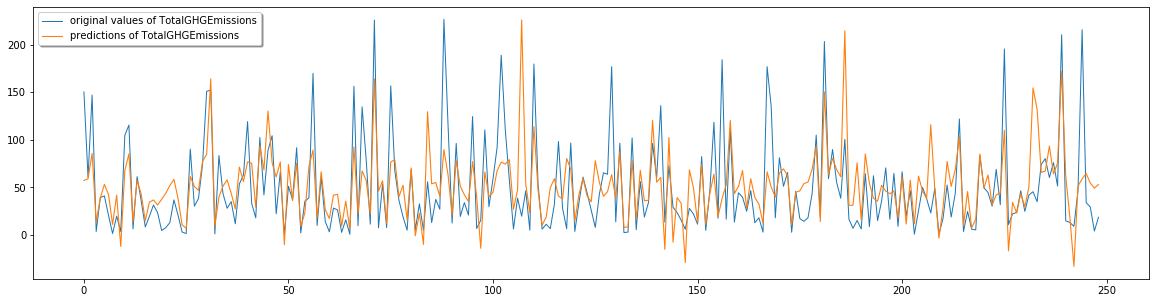

{'best_params': {'alpha': 0, 'l1_ratio': 0}, 'R2': -0.07982688391827, 'rmse': 39.08500267005111, 'model': 'ElasticNet', 'time_elapsed': 0.11827053500746842}


,best_params,R2,rmse,model,time_elapsed
0,None,0.3665,39.0850,LinearRegression,0.0025
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",-0.0384,38.9913,Ridge,1.6244
2,"{'alpha': 0.105, 'fit_intercept': True}",0.0013,38.8073,Lasso,0.0399
3,"{'alpha': 0, 'l1_ratio': 0}",-0.0798,39.0850,ElasticNet,0.1183


In [37]:
train_x=X_train.values
test_x=X_test.values
 
param_grid = [{"alpha": [0],#np.arange(0,2,1),  #coefficient qui multiplie le terme de pénalité
              "l1_ratio": [0],#np.arange(0, 1, 0.01)#L1 ratio si = 1 équivaut à un Lasso si 0 à un Ridge
}]

 
model = ElasticNet( random_state=random_state,normalize=False)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result=df_result.append(result,ignore_index = True)
print(result)
df_result

#### 4-2 <u>Régression de ElasticNet avec ENERGYSTARScore </u>

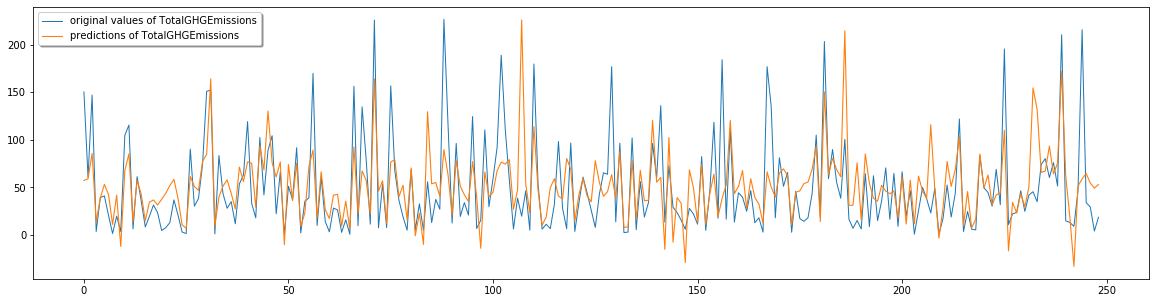

{'best_params': {'alpha': 0, 'l1_ratio': 0}, 'R2': -0.07982688391827, 'rmse': 39.08500267005111, 'model': 'ElasticNet', 'time_elapsed': 0.14484989999618847}


,best_params,R2,rmse,model,time_elapsed
0,None,0.3665,39.0850,LinearRegression,0.0026
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",-0.0384,38.9913,Ridge,1.5721
2,"{'alpha': 0.105, 'fit_intercept': True}",0.0013,38.8073,Lasso,0.0325
3,"{'alpha': 0, 'l1_ratio': 0}",-0.0798,39.0850,ElasticNet,0.1448


In [38]:
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values
 
param_grid = [{"alpha": [0],#np.arange(0,2,1),  #coefficient qui multiplie le terme de pénalité
              "l1_ratio": [0],#np.arange(0, 1, 0.01)#L1 ratio si = 1 équivaut à un Lasso si 0 à un Ridge
}]

 
model = ElasticNet( random_state=random_state,normalize=False)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
print(result)
df_result_with_energy_star_score

Conclusion modèles linéaires: La régularisation Ridge avec le pramaètre alpha=1 reste le meilleur modèle, la prise en compte de ENERGYSTARScore comme variable explicative améliore les performance du modèle

## Partie 2 modèles non linéaires

### 1 <u>Random Forest</u>

#### 1-1 <u>Random Forest sans ENERGYSTARScore </u>

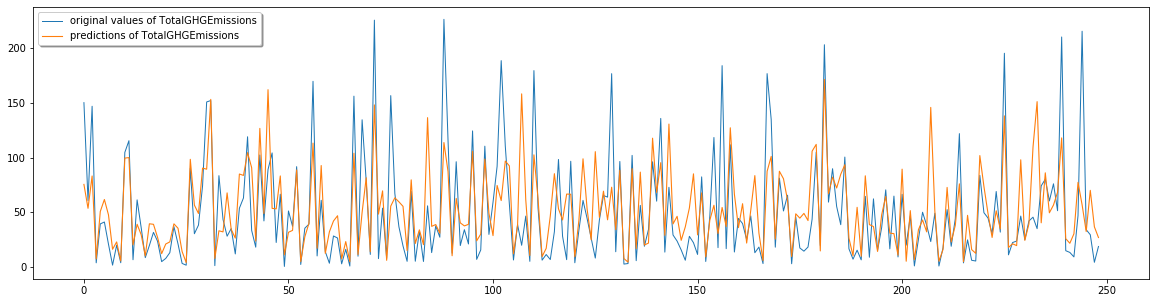

{'best_params': {'bootstrap': True, 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'n_estimators': 100}, 'R2': 0.5102944379896728, 'rmse': 36.41496632534881, 'model': 'RandomForestRegressor', 'time_elapsed': 5.103028236000682}


,best_params,R2,rmse,model,time_elapsed
0,None,0.3665,39.0850,LinearRegression,0.0025
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",-0.0384,38.9913,Ridge,1.6244
2,"{'alpha': 0.105, 'fit_intercept': True}",0.0013,38.8073,Lasso,0.0399
3,"{'alpha': 0, 'l1_ratio': 0}",-0.0798,39.0850,ElasticNet,0.1183
4,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.5103,36.4150,RandomForestRegressor,5.1030


In [39]:

train_x=X_train.values
test_x=X_test.values
 


'''
param_grid = {
'n_estimators':[5,20,50,100], # nombre d'arbres
'max_features':['auto', 'sqrt'], # nombre de variables tenu en compte pour la création de chaque arbre
'max_depth':np.arange(10,130,10), # nombre maximum de niveaux dans chaque arbre de décision 
'min_samples_split':[2, 6, 10], # nombre minimal d'observation avant séparation du noeud
'min_samples_leaf':[1, 3, 4], #nombre minimal d'observation pour créer une feuille
'bootstrap':[True, False] # méthode d'échantillonnage
}   
'''
 
## best params
param_grid={'bootstrap': [True],
 'max_depth': [10],
 'max_features': ['auto'],
 'min_samples_leaf': [3],
 'min_samples_split': [2],
 'n_estimators': [100]
           }

model = RandomForestRegressor(random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result=df_result.append(result,ignore_index = True)
print(result)
df_result


#### 1-2 <u>Random Forest avec ENERGYSTARScore </u>

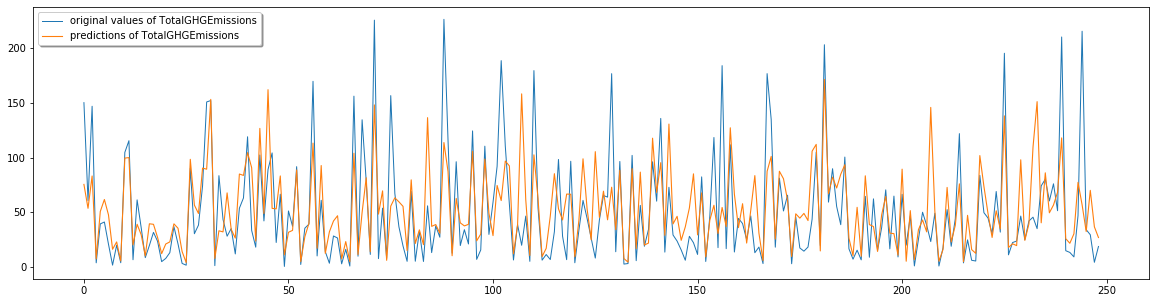

,best_params,R2,rmse,model,time_elapsed
0,None,0.3665,39.0850,LinearRegression,0.0026
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",-0.0384,38.9913,Ridge,1.5721
2,"{'alpha': 0.105, 'fit_intercept': True}",0.0013,38.8073,Lasso,0.0325
3,"{'alpha': 0, 'l1_ratio': 0}",-0.0798,39.0850,ElasticNet,0.1448
4,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.5103,36.4150,RandomForestRegressor,5.1540


In [40]:
 
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values
 

 


## best params
param_grid={'bootstrap': [True],
 'max_depth': [10],
 'max_features': ['auto'],
 'min_samples_leaf': [3],
 'min_samples_split': [2],
 'n_estimators': [100]
           }
model = RandomForestRegressor(random_state=random_state)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
df_result_with_energy_star_score
 

  ### 2 <u>XGBoost</u>

#### 2-1 <u>XGBoost sans ENERGYSTARScore </u>

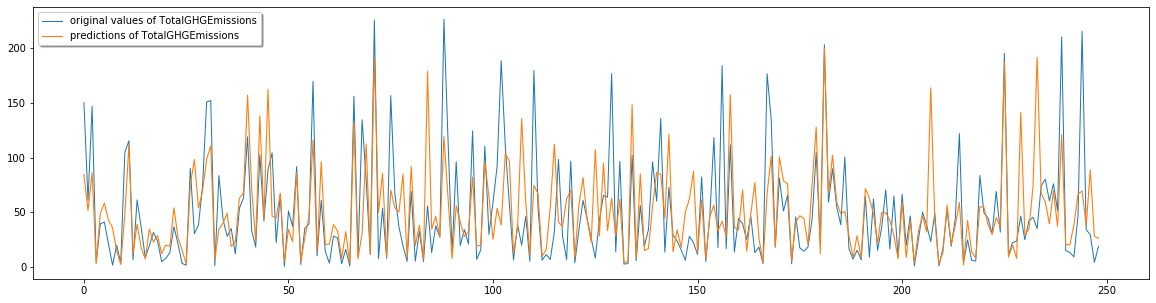

,best_params,R2,rmse,model,time_elapsed
0,None,0.3665,39.0850,LinearRegression,0.0025
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",-0.0384,38.9913,Ridge,1.6244
2,"{'alpha': 0.105, 'fit_intercept': True}",0.0013,38.8073,Lasso,0.0399
3,"{'alpha': 0, 'l1_ratio': 0}",-0.0798,39.0850,ElasticNet,0.1183
4,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.5103,36.4150,RandomForestRegressor,5.1030
5,"{'learning_rate': 0.1, 'max_depth': 25, 'n_est...",0.3848,39.1974,XGBRegressor,2.8123


In [41]:
 
train_x=X_train.values
test_x=X_test.values
 
'''
param_grid = {
    'learning_rate':np.arange(0.1,1,0.1),
    'n_estimators':  np.arange(50, 110, 10),  #nombre d'arbres de décision 50
              'max_depth': np.arange(20, 50, 5)} #nombre maximum de niveaux dans chaque arbre de décision 20
# define the model/ estimator
'''

param_grid={'learning_rate': [0.1], 'max_depth': [25], 'n_estimators': [50]}

model = XGBRegressor(random_state=42)
result=utils.grid_search_cv_func(df,target_col,feature_cols,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)


df_result=df_result.append(result,ignore_index = True)
df_result

#### 2-2 <u>XGBoost avec ENERGYSTARScore </u>

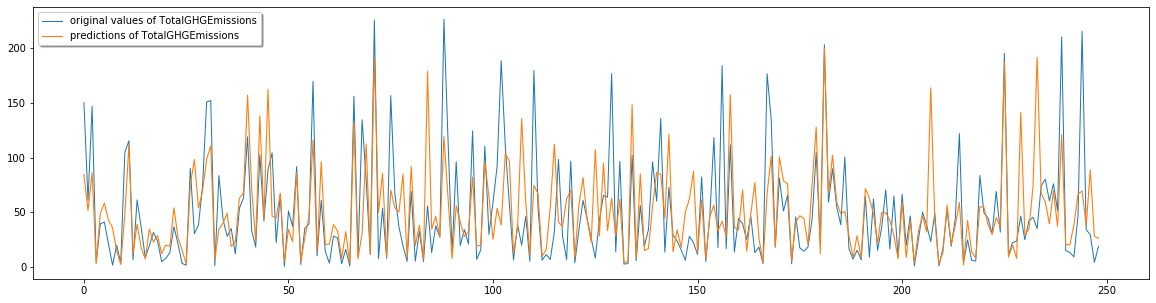

,best_params,R2,rmse,model,time_elapsed
0,None,0.3665,39.0850,LinearRegression,0.0026
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",-0.0384,38.9913,Ridge,1.5721
2,"{'alpha': 0.105, 'fit_intercept': True}",0.0013,38.8073,Lasso,0.0325
3,"{'alpha': 0, 'l1_ratio': 0}",-0.0798,39.0850,ElasticNet,0.1448
4,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.5103,36.4150,RandomForestRegressor,5.1540
5,"{'learning_rate': 0.1, 'max_depth': 25, 'n_est...",0.3848,39.1974,XGBRegressor,2.8343


In [42]:
 
train_x=X_train_with_energy_star_score.values
test_x=X_test_with_energy_star_score.values

'''
param_grid = {
    'learning_rate':np.arange(0.1,1,0.1),
    'n_estimators':  np.arange(50, 110, 10),  #nombre d'arbres de décision 50
              'max_depth': np.arange(20, 50, 5)} #nombre maximum de niveaux dans chaque arbre de décision 20
# define the model/ estimator
'''

param_grid={'learning_rate': [0.1], 'max_depth': [25], 'n_estimators': [50]}


# define the model/ estimator
model = XGBRegressor(random_state=42)
result=utils.grid_search_cv_func(df,target_col,feature_cols_with_energy_star_score,param_grid,scoring,model,test_size,random_state,cv,train_x,test_x,train_y,test_y)
df_result_with_energy_star_score=df_result_with_energy_star_score.append(result,ignore_index = True)
df_result_with_energy_star_score


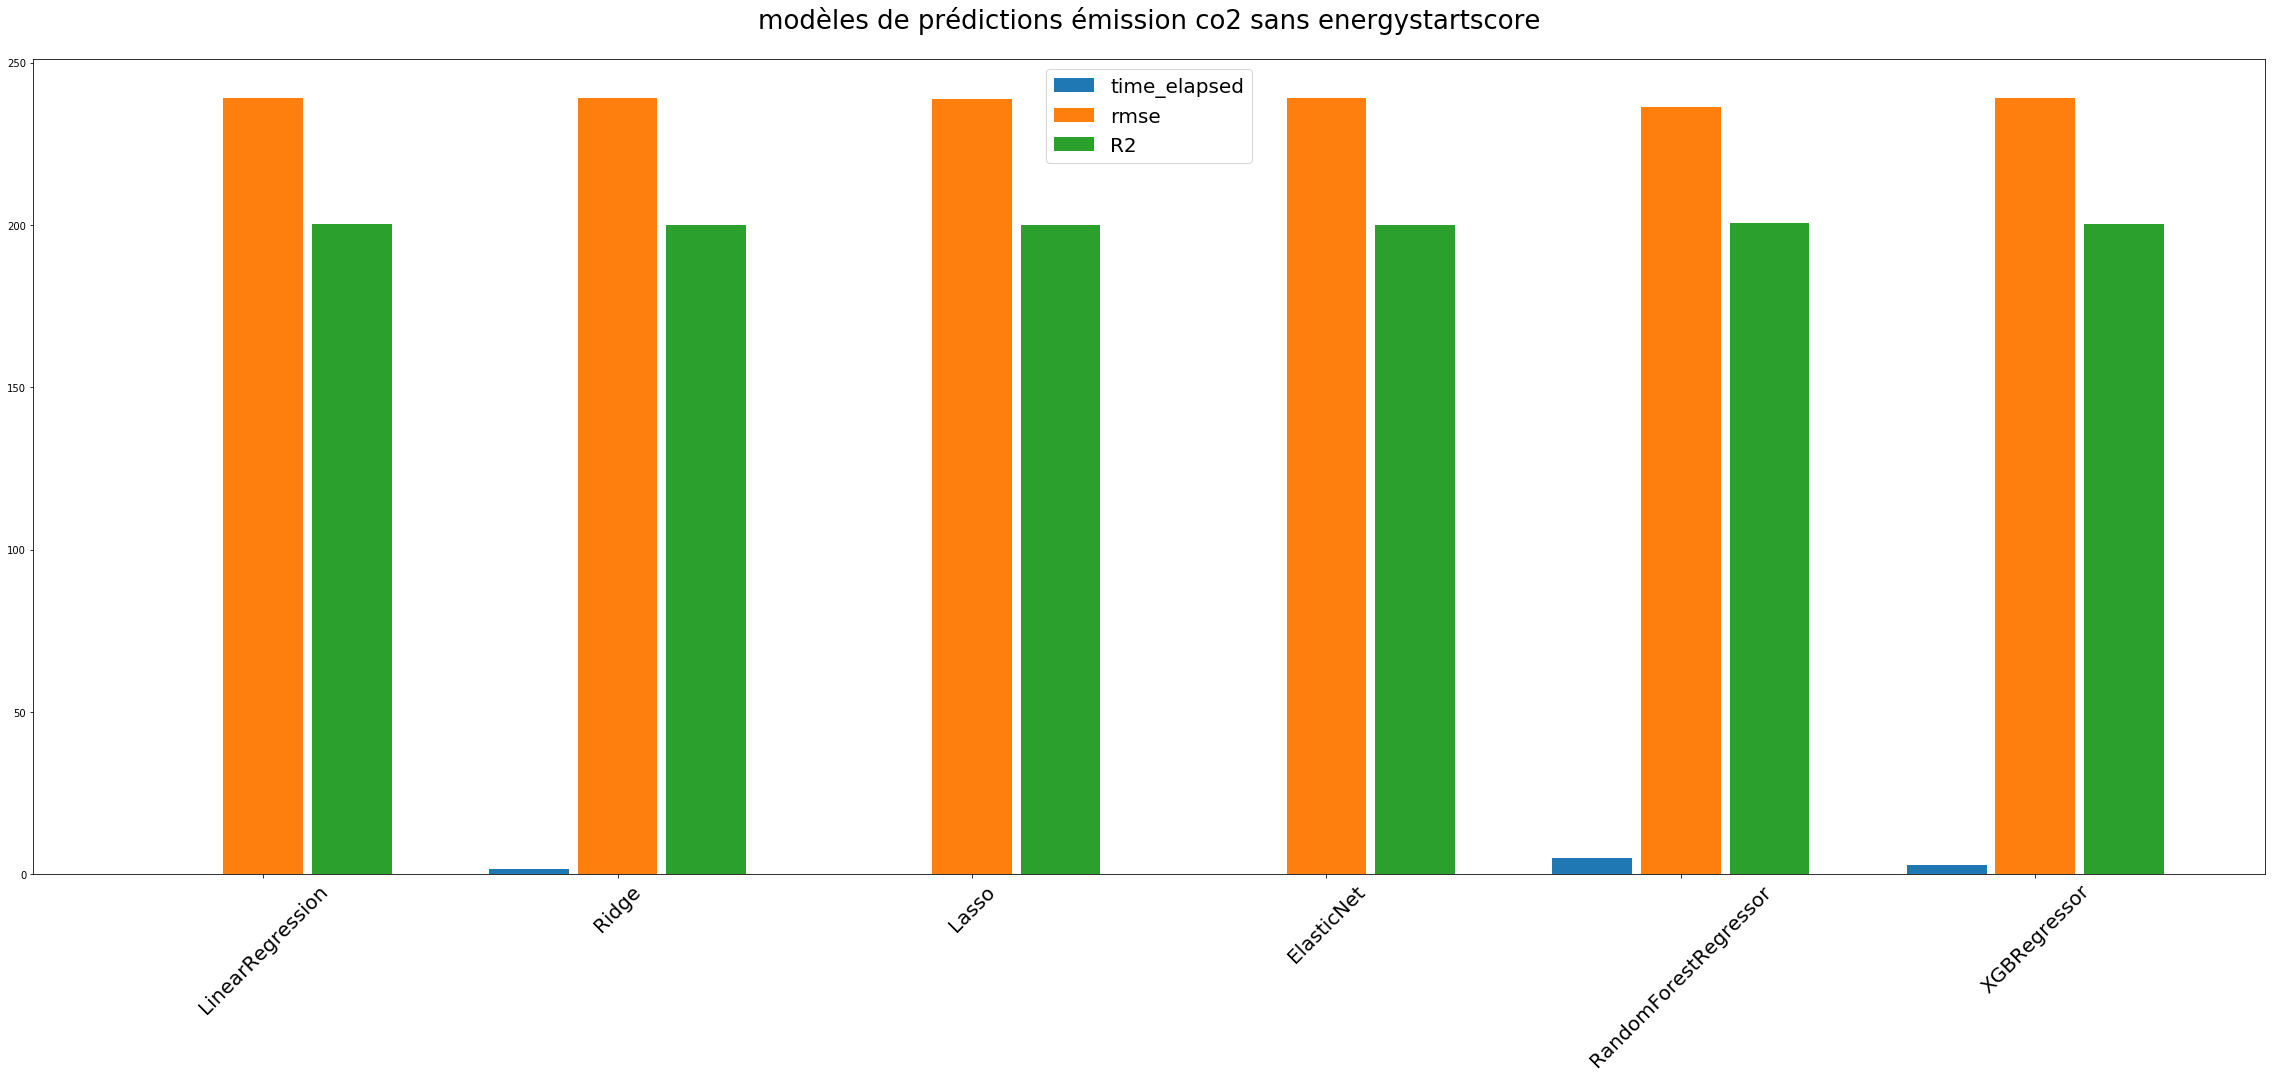

In [43]:
from sklearn.preprocessing import StandardScaler
Labels=df_result['model'].unique().tolist()
 
 
numeric_cols=['R2','rmse','time_elapsed']
fig, ax = plt.subplots(figsize=(40,15))
data_plot=df_result.copy()
data_plot['R2']=data_plot['R2']+200
data_plot['rmse']=data_plot['rmse']+200
 
utils.bar_plot(ax,data_plot[['time_elapsed','rmse','R2']], total_width=1.5, single_width=0.9)
plt.xticks(range(len(Labels)), Labels, fontsize=20, rotation=45)

ttl = plt.title("modèles de prédictions émission co2 sans energystartscore", fontsize=26)
ttl.set_position([.5, 1.03])
plt.show()

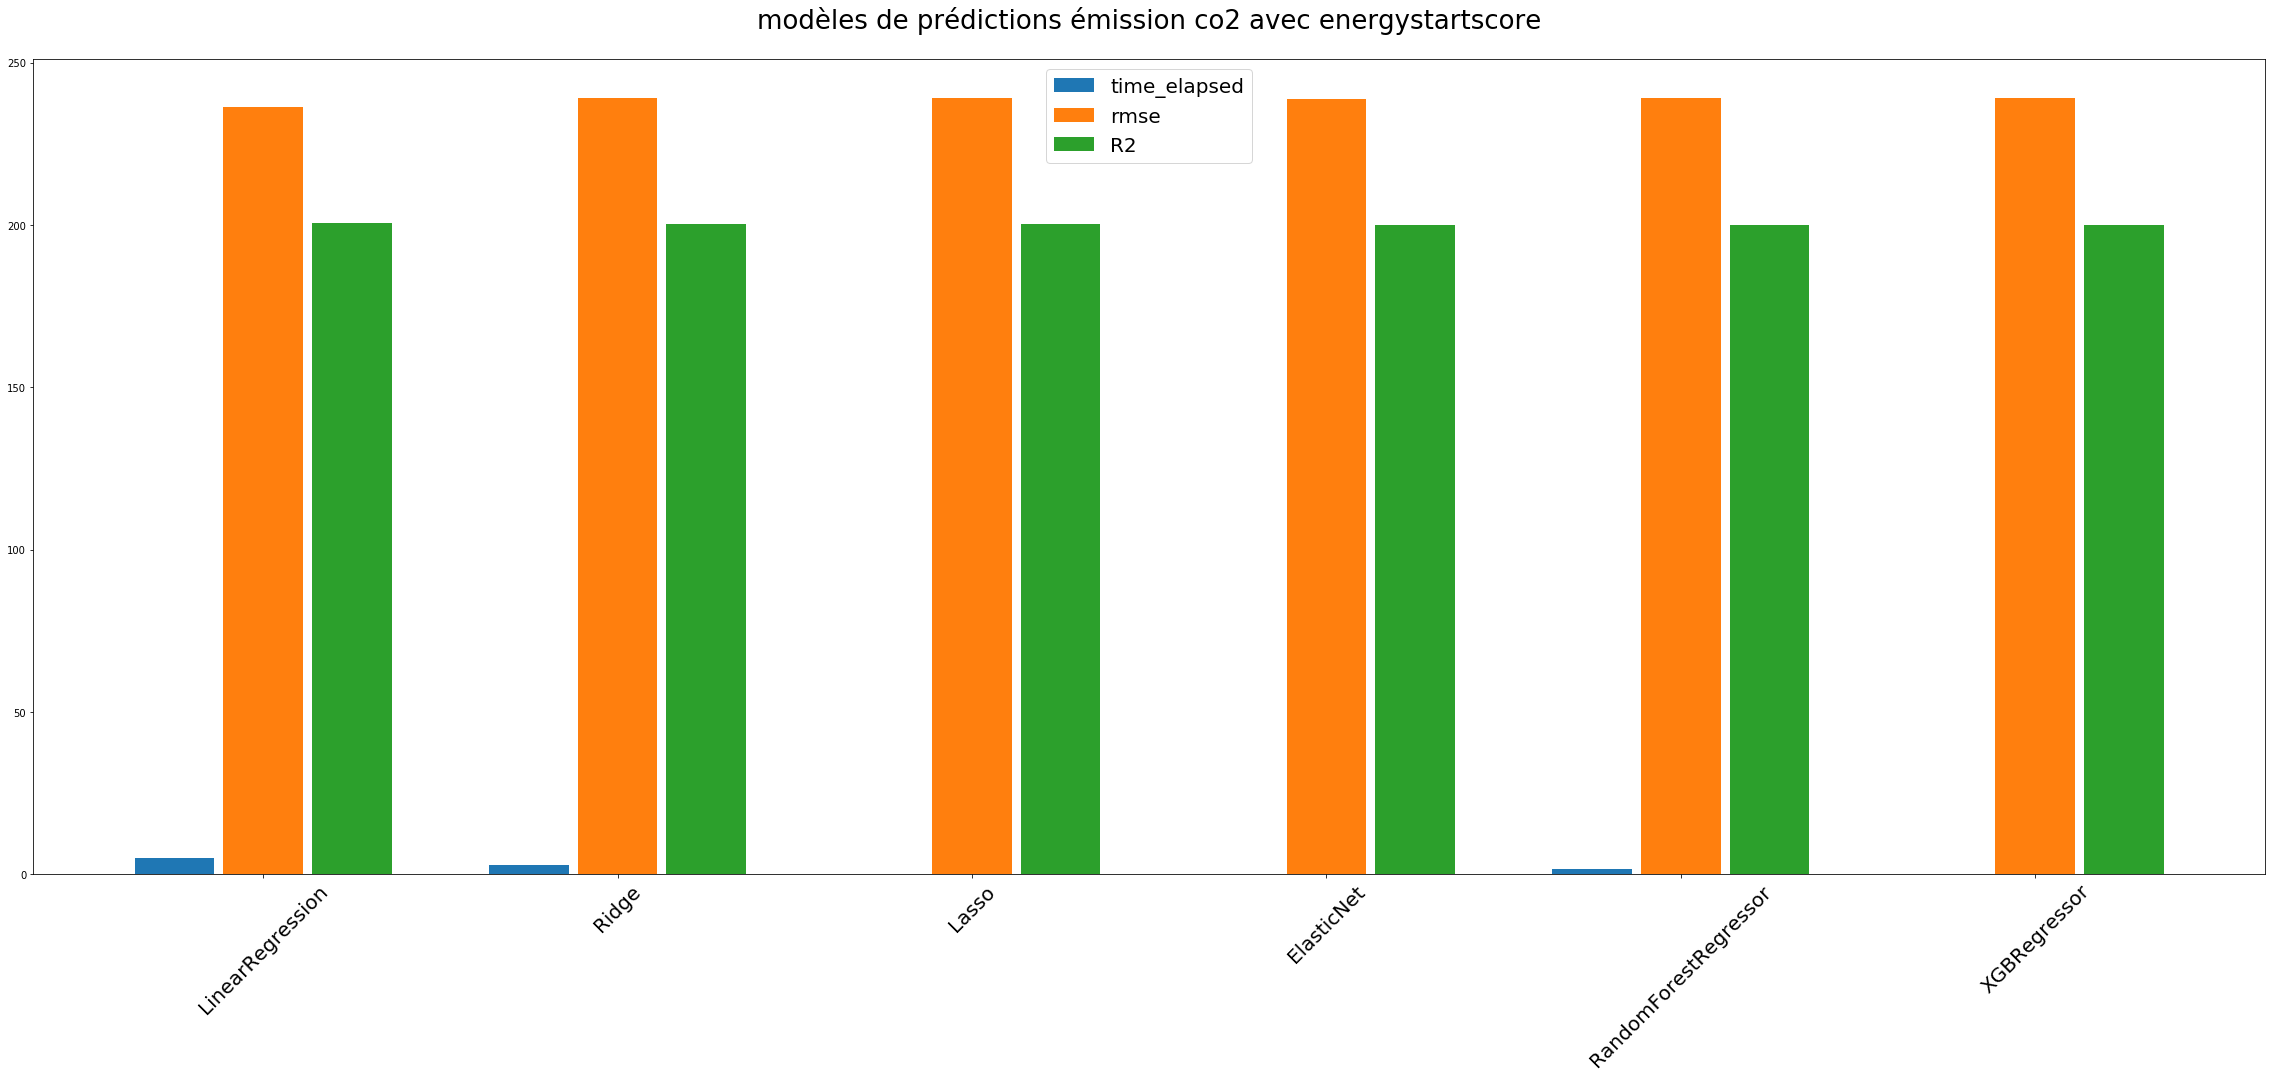

In [44]:
from sklearn.preprocessing import StandardScaler
Labels=df_result_with_energy_star_score['model'].unique().tolist()
 
 
numeric_cols=['R2','rmse','time_elapsed']
fig, ax = plt.subplots(figsize=(40,15))
data_plot=df_result_with_energy_star_score.copy()
data_plot['R2']=data_plot['R2']+200
data_plot['rmse']=data_plot['rmse']+200
 
utils.bar_plot(ax,data_plot[['time_elapsed','rmse','R2']].sort_values(ascending=False,by='R2'), total_width=1.5, single_width=0.9)
plt.xticks(range(len(Labels)), Labels, fontsize=20, rotation=45)

ttl = plt.title("modèles de prédictions émission co2 avec energystartscore", fontsize=26)
ttl.set_position([.5, 1.03])
plt.show()

In [45]:
df_result.sort_values(by='R2',ascending=False)

,best_params,R2,rmse,model,time_elapsed
4,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.5103,36.4150,RandomForestRegressor,5.1030
5,"{'learning_rate': 0.1, 'max_depth': 25, 'n_est...",0.3848,39.1974,XGBRegressor,2.8123
0,None,0.3665,39.0850,LinearRegression,0.0025
2,"{'alpha': 0.105, 'fit_intercept': True}",0.0013,38.8073,Lasso,0.0399
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",-0.0384,38.9913,Ridge,1.6244
3,"{'alpha': 0, 'l1_ratio': 0}",-0.0798,39.0850,ElasticNet,0.1183


In [46]:
df_result_with_energy_star_score.sort_values(by='R2',ascending=False)

,best_params,R2,rmse,model,time_elapsed
4,"{'bootstrap': True, 'max_depth': 10, 'max_feat...",0.5103,36.4150,RandomForestRegressor,5.1540
5,"{'learning_rate': 0.1, 'max_depth': 25, 'n_est...",0.3848,39.1974,XGBRegressor,2.8343
0,None,0.3665,39.0850,LinearRegression,0.0026
2,"{'alpha': 0.105, 'fit_intercept': True}",0.0013,38.8073,Lasso,0.0325
1,"{'alpha': 2, 'fit_intercept': True, 'solver': ...",-0.0384,38.9913,Ridge,1.5721
3,"{'alpha': 0, 'l1_ratio': 0}",-0.0798,39.0850,ElasticNet,0.1448
